In [7]:
from src.train import train

train(input_to_softmax=model, model_name=model_name, spectrogram=False, epochs=2)

Epoch 1/20
467/467 [==============================] - 3003s 6s/step - loss: 257.8258 - val_loss: 255.0784
Epoch 2/20
467/467 [==============================] - 3043s 7s/step - loss: 198.9984 - val_loss: 237.4384
Epoch 3/20
467/467 [==============================] - 3084s 7s/step - loss: 189.7968 - val_loss: 218.9426
Epoch 4/20
467/467 [==============================] - 3071s 7s/step - loss: 152.8838 - val_loss: 175.9336
Epoch 5/20
467/467 [==============================] - 3085s 7s/step - loss: 129.6943 - val_loss: 154.0352
Epoch 6/20
467/467 [==============================] - 3074s 7s/step - loss: 117.7387 - val_loss: 149.7847
Epoch 7/20
467/467 [==============================] - 3074s 7s/step - loss: 108.8953 - val_loss: 138.7086
Epoch 8/20
467/467 [==============================] - 3106s 7s/step - loss: 101.2720 - val_loss: 131.9990
Epoch 9/20
467/467 [==============================] - 3072s 7s/step - loss: 95.4478 - val_loss: 125.5078
Epoch 10/20
467/467 [==========================

In [1]:
from src.char_map import char_map, index_map
from src.models import model_1

model = model_1(input_dim=13,
                units=400,
                activation='relu',
                output_dim=len(char_map)+1)
model_name = "model_1"

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
rnn (GRU)                    (None, None, 400)         496800    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 400)         1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 224)         89824     
_________________________________________________________________
softmax (Activation)         (None, None, 224)         0         
Total params: 588,224
Trainable params: 587,424
Non-trainable params: 800
_________________________________________________________________
None


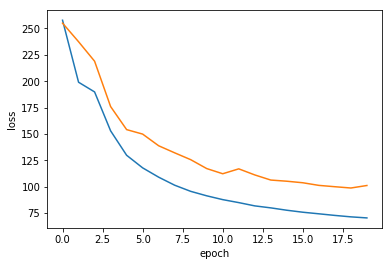

In [4]:
from src.plot import plot_hist

model_name = "model_1"
plot_hist(model_name)

In [2]:
from src.data_generator import data_gen
from src.data_generator import VALID_LENGTH
from src.predict import predict
import time
import pickle

def get_wer():
    start = time.time()
    def wer_single(i):
        wer = predict(i, 'validation', model, verbose=False)
        if (i%10==0) and i>0:
            print("processed %d in %d minutes" % (i, ((time.time() - start)/60)))
        return wer
    wer = list(map(lambda i: wer_single(i), range(0, VALID_LENGTH)))
    print("Total time: %f" % ((time.time() - start)/60))
    return wer

wer = get_wer()

with open('models/' + model_name + '_wer.pickle', 'wb') as handle:
    pickle.dump(wer, handle)

wer: 94
wer: 208
wer: 234
wer: 214
wer: 57
wer: 234
wer: 129
wer: 224
wer: 97
wer: 184
wer: 156
processed 10 in 2 minutes
wer: 112
wer: 166
wer: 125
wer: 58
wer: 89
wer: 65
wer: 224
wer: 170
wer: 78
wer: 165
processed 20 in 4 minutes
wer: 56
wer: 104
wer: 187
wer: 242
wer: 188
wer: 190
wer: 213
wer: 247
wer: 90
wer: 205
processed 30 in 6 minutes
wer: 134
wer: 65
wer: 205
wer: 102
wer: 203
wer: 211
wer: 215
wer: 201
wer: 143
wer: 142
processed 40 in 9 minutes
wer: 87
wer: 63
wer: 70
wer: 146
wer: 234
wer: 68
wer: 204
wer: 141
wer: 147
wer: 179
processed 50 in 11 minutes
wer: 113
wer: 213
wer: 157
wer: 63
wer: 135
wer: 202
wer: 72
wer: 174
wer: 219
wer: 217
processed 60 in 13 minutes
wer: 119
wer: 208
wer: 154
wer: 173
wer: 176
wer: 197
wer: 70
wer: 140
wer: 200
wer: 62
processed 70 in 15 minutes
wer: 174
wer: 99
wer: 181
wer: 71
wer: 63
wer: 72
wer: 75
wer: 151
wer: 195
wer: 62
processed 80 in 17 minutes
wer: 64
wer: 60
wer: 59
wer: 136
wer: 54
wer: 54
wer: 217
wer: 227
wer: 96
wer: 89


In [3]:
import numpy as np
import pickle
from src.predict import predict

predict(0, 'train', model)
predict(1, 'train', model)
predict(2, 'train', model)
predict(3, 'train', model)
predict(4, 'train', model)
predict(5, 'train', model)
predict(6, 'train', model)
predict(7, 'train', model)
predict(8, 'train', model)
predict(9, 'train', model)

Truth: ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል
Predicted: ጌጭሹጭካጌካጐጭቋጭካቋካሶካዤካጪኰጪዊኰጪዊሩሸሩሸቋጪቋጌቼኮጼዛሙጪኰጣኰእኰላጼላጼኰጪህችህጪኰጪኰኩጼጪጧጽቀአእሸሄኬሄአሩህሄህጽጪሹጪሹጪዊአምአ'ዊሸሹራዊዚኙኩጯኩኬጃሹካጪካዊኰአዋኰሹይካጪኰጪሄሙኋሙኛጼጪኰጪኰጪኰጪቆቮሙ'አላሊላሊአሙአሙአሙሩዊዤካዤካቿዊፉዊዋዊዚኩጼዚዋሹአሹዋሙዋሙዋሹአቋዤኬሄርሸሩሸ'ሸቋጃቋጭቋጭጪጭቋካቋሄጭቋጭቋጭ
wer: 191


Truth: ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው
Predicted: ኙጼጌጭጌጭኙጭቋጭቋጭቋጭቋጭቋጱካቋካቋጪካቋሄቋካቋካቋሹቋጭጐጭቋጃቋጪኩኰሯሳኙሳዚኰጹቨችሙጽዚሙሷህሷጪህሙኩሙኩኙጭሙሯሙጯሙኜጪሸጪኙሳጇሙኜሙዋሙዚሷህሷጪሙጪሙጪህጪሹቼኬቼጽሄዚጪኬህአዤዚሹዊሩሙዩጼኜልሸኰቨጪኰጪኰጪኰዱኰጪኰጪጐኬጐጪቿጌሙጪሙአቿአሟጼኰዚኰጼኰሷኰእኰጪኬትዠዊኰቱአ'ሸቀሸኰቋልሶትኬዊአዊዋጪካጪዤካዊሹሸዚቋጪዷጪዷጪዷጪዷቋዷቋጭቋጌቋጃቋጭካቋ
wer: 203


Truth: ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች
Predicted: ጌጭሹጱቋጭቋጭቋጭቋጭቋጭቋጭቋካሄፌግሶጪሶካሄካሹጭካጭካጪሹቋጭቋካቋጭካጭቋልቼጼጪትጪትጪልሶጪሹጪትጪሙጪሙኩሄኩሄሸሄህኬሄኬሄአሙህጪሌጪጼጪሹጃጪሩዊጪሙሷሙጪሙጾሙጾሙጯኩሯጪህሙህሙቿሩሙጪትጪትጪትህጪህጽሽአሙአሙአትአኬሄጔሙጪጔጪጼጪጼጪጔጪጔጪጱጭቋጪዋኰአኰአዊአምአሩጀህአ'አምአህሩዷዞጪጔጪትቁትኰጪቼኬአሸአሸአላሁላጪሩምጼ'ልሹሙአሙአሙሹሙሹ'ቿምቿሩቿሹኬሹኬጐሹሩዊሩቋካቋጪኰአዤአዤአሸአሸላጽአኰአጯኩሙ'ሙ'ሸዤሩኰዚጪህጪህጪዚኰዚኰቼኰዚኰአላአሩአሩሸዚጭሹጪሹሩእምኰእሁእጪጬሩሄኬሄጪሄአልአሹሸኬአኬኰኑላልኮሹጪሹጪሹጪጐጪኰሹጪጐጪኰሩጪሩዤጪቋጭሞቋጭጱጭቋጭልጪኰቋልቋጭቋጭቋጭቋጭቋጭቋጭቋጭቋጭቋልጭጱቋጭቋጭ
wer: 93


Truth: ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት
Predicted: ጌካጪካቋጭቋካቋጭቋጃቋጭቋጭቋካቋሹቋካቋካቋካጪሶካዊካጪፌሶጪሶካሹካቋካቋካጭጪቋኬጱካቋካጭጪጃጪሄጪኬዋጼምዚሸዚሄጪሹቿቱሯኰሯኰጪኰጪቋጪሄህሙህጽኰጽጪኰሷጽአቫሩዚጪሹጪእቱእላእዊእሽቼሄዋቼህችህኬዚልጱጪቋጪቆቼጼጭልጭካጪኰአዊጪሹዊሙዚጭቋጲሄጪህአእላዷኰላኰጽኰዱኰቨኰጪኰጪኰጪትጪቼዠቢጱጭጱሸጪዋዊአዤቋሸአሩአእሁምህጽዚኙዚእዊዚጪሄኰአሸአሸአቀጼላጪጼጪጼጪኰሶኰቋጭኩሙጔሙቿቱጊሩጐሩሶጭቋጃቋልህሩህሄኰጼኰጪጽኰዚኰጃሄሹጃኬሹሙቿሙሹጭሹጭኬጪኬቼችቼዚሸዚሹጱኬሹዊሙሹሩቿህሩሸቋሸልጪሩህጽጪልጬህሩህጪቋጪጐጪኰቼዋአዋዚኰዚጪህጽህኩዚጭጪጔጪጔጪጱጭሹጪኬጪሩሙኩጭሞጭቋጪሹህጪኬሄአኰሸዊዤሸዤሸቋዤዊጬርጪካጪካዤሹሸቋጭቋጭቋኩጭቋጭቋጭካጭካቋጭቋጭጃጪካሹጭ
wer: 111


Truth: እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው
Predicted: ኙጼጭጌጭኙጭሸጭቋጭቋጭቋጭልቋጭቋካቋካቋካቋካቋካቋካጌቋካቋካቋሄቋካቋጪቋጪቋሹጪኰቋሶቋጪቋጭቋጭቋጭጃኰአኰጪኰአኰአኰጪጌካዊጪጯሙጪሙጪሙምጌካጪሄጪኬዊጪኩጭሙጭጪትጭሙቁጪቢጪኬጪትጪኬጪኬህጪኬጪሹጭሹካጪዊጪቱዊዋቀሸኰአኰቱዚቋሹጪቿህችዚኰጪኰጪቆጪቮጪኬልሄካኬቂኬዠሩእፉአዊዤአጦሙዤአዊሟቼጼቼጪኬጪኬትኬቂትኬዋሄአሙጾሙጼሙቿሩሽሄአሄአሄአልሸጬሩህጪዞጪኩሄጪህሄዋሄኬሽሩጬኬጪሩአሙአሙጪዊኬትኰሩዊኰዊሸዊሸዊኰጪኰጪኰጪትኬዠዊአዊዋጪዊካዊካዊዬካቋካቋካቋጭቋሄቋጭ
wer: 33


Truth: እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ
Predicted: ጌጪጭቋጭቋጭጃቋካቋካቋጭቋጭቋካቋካጭካቋጃቋካቋሹሸቋጃቋጭቋጭቋልቋጭቋጭቋጭቋጭቋጭቋጭቋጭቋጭካቋሄቋሄካቋሄፌቋካሄቋሹቋጐቋጭልሹካጭካቋጭጃጪሷጪእጪእጪላእአሙአሙእሙእኰእዤዊሹዊምእምእሙሯጯሯጯጀጯሙልአዚሸይዚጪሄአዊአሙኜጾሙጾአቿአሽኬሽኬቀሸአእሸእሸሄሸቀሸዊዬሹኰጪሹጪዊአ'አዊሸዊሹሙጔሙጔልካሹቿአ'ሩሁሶጪዊአቱዊኰቱኰዚጪሩጪኚጪኛጭቋሸቋዚጇቦዚዊዤጪዤጪርጬቋጪዊጪዊጪካጪሹጭሹጭጪኰጪ
wer: 216


Truth: አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው
Predicted: ኰጪኰጪኰቋጪሄልጭጃጪሄኩሄጪሄጪሄካጌካሄሶዤካጪሄጪካጪሄጪርጪሶጪሶሩጐጽርቋካቋሹቋሶቋካቋጱቋጭቋጭቋጭቋጭቋጭቋጭቋካቋልዤሹሙቀሙቺሙቱሙጯምኰቱዊጪትጪሙሷሙሷጯጪጯኩጪሙጪሙጪሙጪሙጀእሷጪትጪትጪትጪእኰጪኰዩሙ'አ'አምሙሲሹጐኬሹጪሙጪጼኰጪኩጪኩጪጼጪጼጪኰጪኰጪኰትጪሙጪሹጪኰጪዊጪካኬጪትጪትጪጼጪሹጪሹጪሹጪህኬካኬዊሩህሩላጪሹጐኬጐኬሙ'ሙሴአዊሙዊሙጪሙቆሙጪካሹቿ'ቿዤጪዊጪዊጪሙአሙምሙዊሩካይሄይሄህኬህጪትጪላጪካጪዊአምአምሩእሩህዋህዋጼጭኜቨዚዱዚአዤሸሶቋጪሩኰአሩቿሙሹሸዊጪሙጪሙጪቼጪሄዊሹዊሙአሙዊሹቿኬሹጭካጪሹቼጼሹጐሹጪኰጪቂኬዠኬጼዋጪኰዊጪዷሩሹጬሸቋጭቋጪጭቋጭካቋካዤዊይካሄሶጭቋጭቋጭጪቋሄቋካጪቋጪኰቋጌካጭጪ
wer: 90


Truth: ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም
Predicted: ጌካቋጪቋጪዷጪካጪካቋካቋካይካጪካጪዊሶጪካሶጪካሄካቋካልቋጃጪቋጪጃጭካጪጃካጪቿትምሙጪጯጪኰሙቋሙጪሙዋሙ'ሙቆጪቆ'ቨቼቨጼጇሳጪሯጪጭሙጪሙሷጪኬዊኬሹጪትጪትጪጼጪጼቼጪልህሩላቿላኰጼኰጼህሙህካጪካዊቿምሙጾሙጾሙቿህጪዊጪቿአጆዬጭቋልካቿአ'ሩካዊጪም'ምሩኩሁሸሄጪጽህሩህጾዚኩጼጾህአጽአኰአሄአምአምዤልዤአሩእላእኰጪዋአዋአህችህጪዚሸኬሸሶጌህሙህጌካሹካዊ'አሸዊሹይካይቋጪዊጬምጬምእቫእሩጬቋይዤካዤጪኰጪኰጪቋጪሹጪፊጪጼጪትጪትጪትጪኰጪኰእጪእዤዊአጾሙዋሙአሙአኰአኰዊኰጪሩላህኰዚጥኰጥኰጥኰሸሩአሸዚዋኰዊዚሄጪሹጪኰዊኰጼኰጪዚእሸጪትጪህጪሷጪሷአዋአዋህሄዊኰጪህችጼኰዷላኰሩኰጽኰጪዠጪኬጪቼኬጪኬላሉላሩኬኰሩሸአኰሩአሸዊአዊአዤሩዤሩሸጪቋጪቋካጭቋጭቋጭኰጃቋሄቋጭ
wer: 112


Truth: ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ ገኝ አል ካደ ችም
Predicted: ጪጭካጭቋጭቋጽቋጽጪጽቋጽጪኰጪጃጪቋልቋ'ቋ'ካ'ካቋካቋካቋካዤቋ'ቋልጭቋጭቋጭቋጭጪጼጪጼጪኰትኬጪቿሷሙሷኩጪዚጪጽጪኩህሙአምሙጯሙጯእኰቱኬቂኰቿቱአዡአዊአጧአ'አቫጀቿሩላሩልካሄአዤአሙአሙዋፎኰዊጪሙጪሙጪህጪህጪህኬጪሹጪጭጪካዊቿምሙአሙቋሙቀእኰሸእኰእኰጽአዚኰቱኰጥኰጼጪኰጪሄሶጪቼዠቼዠትሙኰሷኰቼሟጪዮሸዚሸዤሸቋጽጪትአዋቀሸዚኰጪህሩህጪጐጪኰጪኰትጪቼዠአጪዤጪዤሩዤዷሹሸሹቋጃቋልቋካጭቋጭቋሶጭካሶጭሶቋጭቋጭቋጭቋጭቋጭቋጭቋጃ
wer: 234


Truth: ላቁኦተ ትምህርት ቤት መንገድ ና ሆስፒታል ተ ገንብቷል
Predicted: ጌመጌካቋካኜሹካቋካጪቋጃቋጭካጭቋጭካጭካቋካቋጌሄካጪሶቋሄቋጭቋይቋካቋይቋካቋካቋሄሸቋጭጪሞሷሙሷሩሸጽቀሙቀሙኰሸቋኜጪቆጇህጇህጇጹቆሙሷሙጽኜሙቋሶሹጪቿምአሙአኰላይሄጪሹኰጭዱኰዱኰዚዊኰቿጌሹካጪጬሩላኩየሽጪህጪህጪጔጪሶጪኰጪዱሯዱሸልሸኰሸኰዚኰጪጽህሷሸኰጪሩህሸላሸእሸአሸዤሸጦሸ'ሙ'ሙኢጊጃጊሩካጪጼጪጼጪጌጪሹዋሙአሙቶሙጭሸቋካዊሙዚሄሹሄዋኛሸኚሷጪኩጪኰጪአዤአቋካሹአልዋኬሹጬሩዊሩካዊካሹዷቋጃቋጭቋጭቋጪጭጃቋ
wer: 230


In [ ]:
import numpy as np
import pickle
from src.predict import predict

#wer = pickle.load(open('models/' + model_name + '_wer.pickle', "rb" ))
wer_index = np.argsort(wer)
predict(wer_index[0], 'validation', model)
predict(wer_index[1], 'validation', model)
predict(wer_index[2], 'validation', model)
predict(wer_index[3], 'validation', model)
predict(wer_index[4], 'validation', model)
predict(wer_index[5], 'validation', model)
predict(wer_index[-1], 'validation', model)
predict(wer_index[-2], 'validation', model)
predict(wer_index[-3], 'validation', model)
predict(wer_index[-4], 'validation', model)
predict(wer_index[-5], 'validation', model)
predict(wer_index[-6], 'validation', model)

Truth: እኚህ ወገኖቻችን ደግሞ አፍርሰው የሚ ገዙ ሆኑ
Predicted: ኙጼጌጭጌጭኙሹካሹካሹካቋጃካጃላጃሹቋሹቋሹካሹቋሹቋካሹልሹካሹቋሹቋሹቋሹቋሹቋሹቋሹካሹቋሹቋሹቋሹቋሹቋሹቋሹቋልሹቋሹቋሹካሹቋሹቋሹጃሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹጃሹዠምሙቼሙጪቼጪጂጪቼጪቼጪቼጪሙትሙጂሙጂሙጂሙጂሙጂሙቼሙጪሙቼትቼትኬትቂቼሙቼሙቼኬሄኬያጃቂጪቃጪቃጪሙምሙምሙጂሙጪሙጂቼሙቼሙቼህቼሙቋሙሹሙቋጪቋጪሙቋሙቋሙትጃኬጃሹጪሙጯሙጯጊኬጃኬጃሙጂሙትሙትሙቼሙቼሹቋሹቋሹቼሹቼጪቼጪቼሙቼሙጪቼጪቼቢጪቼጪቼጪሙምሙኩሙምቱቂኖጪሙጪጧጪጯጪጃጪሹቋሹካሹቋኬሄቋጽ'ም'ልሙጪሙጪቼኬሹጃሹጃሹካሹካሹካቋጃሹቋ
wer: 35


Truth: በዚህ ምክንያት ወሳኝ የሆኑት ን ተጫዋቾች ን እያጣ ን ነው
Predicted: ሙቋጯቋሹካጪሹቋሹቋሹቋሹቋሹቋሹቋሹቋሹካሹጃካጃካጃካጃካጃካጃካጃካጃካጃካጃቋካሹካሹቋካሹቋሹጯጪጯሙምሙምሙጃጊጃቿቼጪቼጪቼጪትጪሙጪሙጪሙጪሙሩሙኬሩአሙእሙእሙአኬሄኬጃሩላልምሙጂሙጯኬጊኬጊኬጃኬሙአሙዠሙጂሙጪትጪሙጂቼጂቼጪሙጪሙጯሙሹጃሙቿሙጪቼጪቼጪሹጪሹጪጃሹጃምሙሩትቂኬቼሙቼሙሄሙሄሙቀሙኬቼኬሙትሙትሙቼሹጪያቂያቂምጪቼጪቼጪቼጪሹካሹቋሹቋቼሌቼትቼቂቼትቼዠሙኬሙኬሙኬሄኬአኬሙኬሙቋሙ'ሙምሙጪሙጃቋጃሹካሹጪቼጪቼጪቼጪሙልሙ'ሙ'ልሹቋልሹካሹቋሹቋሹቋሹቋሹቋ
wer: 37


Truth: ቡና ገበያ አደገኛ የሚለው ዜማ ቸው በተለይ መታወቂያ ቸው ሆኗል
Predicted: ኙጼጌጭጌጭኙቋሹቋሹቋኬሹካሹቋሹቋሹቋሹቋሹጃቋሹቋሹቋሹቋሹቋሹቋጪሹቋጃሹጃሹጃካሹጃኬቋሹጪሹቋሹቋሹቋሹቋሹቋሹቋጃቋሹቋሹቋሹቋሹቋሹቋጪጥጪላጪላጪኰጪኰጃጪሙጪሙጪሙጪላጪእሙምሙምሙምሙምሙጪሙህሙጪሙጪቼሙህሙቼሙሄሙሄሙሄሙቼልሹሙቼሙጪሹቼሹቼጪቼጪቼኰቨኰቼኬቼችቼችቼህቼህቼጪጥጪየጪቼጪቼጪቼሙጪሙጪሙጪዬሹጪሹቼህጪዩጪዩሙሄሙኰጪቋሹጃኬቂሙጪሙጪሙኩሙምሙልሹጃሹሙዠሙቼሙቼሙዠሙሷጪሙሄሙልቋሹቋኬሙዩሙቨሙምጪሹጪሙህሙሄጪኰጃቋያጃሹሙዩሙቼጪቋሙቨሙዩሙጪሙጯሙቋጃሹጃሹጃሹጃሄጃሄጃሄጃሄጪሄጃሄሹሄሹጃቋጃጪሄጪሄጃጪሹጃ
wer: 40


Truth: ሊደረግ ለ ታሰበው ለውጥ ጥናትና ዝግጅቱ ን እየተገባደደ ነው ብለዋል
Predicted: ሙሹጪሹጪሹቋሹጃሹጃሹኬሹጪሹቋሹጃሹቋጃሹካሹካሹቋሹቋሹቋሹጪቼጪቼጪቼጪሹጃያሙያሙሄሙሹሙምሙምሙልጃጪሙጪሙምሙላልኬሙቱኰሙኬጃኬጃኬጃኬጪሙጪሙጪሙጪሙጪሙጪሙጪሙጪሙጪሙዩሙጪሙጪሙጪሙሹጃሹጪሹቋሹጃኬሙኬሙኬሙቼዩሙቺሙምሙኰቋሹቋሹቼሹጪሙጪሙጪሙጪሙጪሙጪሙጪሙጯልጃሹሙዬልሹጪሙጪካሹጪሹጪላጪሙጪሹሩጃቱሹቱሙጪሙጪምጪቃጪቃጪሙቼጪሹካሹሙላሙጪሹጪሙዩሙጯሙዩሙላሙምቋሹቋሹቼምሙጪልሹቼምልዩኰዱኰዚኰቨኰጥኰቋሹቋቼልሹጪሙቋሙቋጃሹጃሄጃሹጃሹካሹጃሹቋሹቋሹቋሹቋሹካሹካሹ
wer: 43


Truth: በ ሰሞኑ የ ድንበር ውዝግብ ዙሪያ የ ተጠናከረ ው ዘገባ ቀጥሎ ቀርቧል
Predicted: ቋጃቋሹቋሹጃጪሹጪጃሹቋሹካሹቋሹቋሹቋሹቋሹቋሹቋሹጃሹጃሹጃቋሹቋጃሹጃካጃሹጃካጃካጃሹጃቋጃካሹቋካሹቋሹቋሹቋሹቋሹሙቼሙቼሹኬቼሙቼሙቼሙቼሙቼሙጪሙጪሙጪቼጪቼሙቼጪቼጪሙጪሙጪቼጪጂጪሙቼሙጯሙጪሙጪቼጪቼጯሙቂእቂልካኬሹቂሙትጪትቂቼቂትቂትጪሙምሙዠሙጽሙጽሙጽእኰኬቋጃልሩሙልሩሙምሙምኬጃምሙሄሙጪሙምሙምሙጃሙጃሙምሙዠሙጪሙትጪቼጪሙዠሙምሙምሙቺሙጂሙጽሙቋሙቋሙቋሙቋሙጪቋጪቋጃቼሙኬሙቀሙምኬሄኬሹቼጪቼጪሙጪሙጪሙምጪሙጪሙኬሙኬሙጪሙጪሙጪሙሄሙሄሙልሙሹጃሹጃሹቋሹቋሹቋካሹቋሹቋሹካሹቋሹ
wer: 44


Truth: በ ብሄራዊ ሊጉ ከ ከተማ ወደ ከተማ መ ዘዋወሩ ተጨማሪ ወጪ ያስከትል ብናል
Predicted: ቋጃሹካሹካሹካሹካጃሹቋሹጃቋሹቋሹካሹካሹቋሹቋሹቋሹካሹካሹካሹካጪሹቋሹቋጪሹቋሹሙጯሙምሙጯሙጯሙጪሙጪሙችቼሙቼሙልሙልሙምሙህሙህሙጪሙጪቼጪቃጪሙቿሙጪሹጪሙጪጯጪጯጪካሹጪሙጪሙጪሙልሙሹሙጪሙምልሹኬጃሄሙምሙጪሙጪሙጪሙጹሙቆሙዥሙህቼትቼሙልምሹጪሙጪሙምሹኬሹዊሙጪሙጪሙጪሙዥሙሹሙልሙልጯቼሹኬሹጪሙቼሙቀሙቆሙ'ሙጪሙጯሙቼሹካሹኬህቼሹጪሹጪሹያሹካሹካሹጃጪሙጪሙጪሙጪሙጪሙዥሙአሙአሙህሙጪሙጯጪጯሙጪሙህሙቼሹካጪሹቂጪሹጪሙጪሙጪሙዠአምሙቿጃኬጃሹካዊሙልሙሹቋሹኬሄሹልምሙጯጪሹቋሹካሹሩሙምሙሹሙሹሙሹቋሹቋሹቋሹካጪሹካሹ
wer: 45


Truth: መንግስት የ መለሳቸው የቤተ ክህነት ህንጻዎች ከ አባ ጳውሎስ እጅ እንደማይ ወጡ ተገለጸ
Predicted: ሙጪሹካሹካሹካሹጃሹጪሹጪጃያጃጪጃጪሩጪሩጪሩጪሹጃሹካቋኬሙጪሙጂጽሙጪሙጪሙጪሙጯሙቃሙቂጪሹጪቂምቼሙቼሙጪሙቀሙጯሙጪሙምሙምቼኬቂቼሙቼሙቀሙቼሹኬሹኬጪሙቺሙትሙምሙምሙምሙሩምሩሹኬሹሙህምሙኬጪሙሩምሙጪሙጂሙቺሙጯሹኬሙጪሙጪሙጪቂጪሹቼሙሄሙሄሙቺሙጪቂኬሹቋሙጪሙሄሙቼሙቼሙቼቋሹቋኬቼሙቼሙቼሹቼሙቼሙቼሙቼሙጪሙጪሙጪሹኖቂሩቂጪቂጪጃቂሩምሙጪየጪሙቼሙቼጪልጪቼሙሄሙጪሙጪሙጪሹሙጪሙጪሙጪኬሄቼሙቼጯሙህሙጪቼጪትጪሙጪሙጪሹቂጪሹጪሙሹጪሹጪሹካሹካሹካጪካሹካሹካሹ
wer: 252


Truth: በ ቅዳሜ የ ተደረጉት ግጥሚያ ዎች ለ ተመልካቹ ቁጥር ዝቅተኛ መሆን ምክንያት ሆኗል
Predicted: ጪቋሹቋሹቋሹጃሹካሹካሹካሹጃሹካሹጪጃሹካሹቋሹካሹካሹካሹካሹቋሹልሹካሹካሹጪዬጯሙምቼሙምጪሙጪሙምሙምቼምቂሞቂጪምጪምጪሙጪሹጪኬሹቼጪሹቼምሙምሙጪሙቿሙልሙጯጪቋሙቃጪሹጪላጪቼሙጯልጪሹጪካጃጪሙጪምሙጪሙጯሙጪሹካሹኬቂትቂኬትኬሹያምሙጯካሹጪሙምሙጪሙጯሙቿምሙቋጪሙጪሙጪሙምጪሹኬሹጪጯጪቋጽቋጪካሹጪሙምሙጪሹጃሹጃሙጪካቋጪሙጯላጃቿሹቼጪሙጪሙጪጧጪሙጪሙጪሙጪምጪሙጪሙጪሙጪጯሙጪጯሙጪሙጪምጪምቂምሹጪሹጪቨጪምሙጪሙጪሙጧጪምሩጃምጃካጪካሹካሹካሹካሹጪቋሹ
wer: 248


Truth: ከ ቤተሰባችን መካከል በ እርሻ ተግባር ላይ ያል ተሰማራ ችው እናታችን ብቻ ነበረች
Predicted: ሙልሹጪሹቋሹቋሹካሹካቋሹካሹቋሹቋሹካሹቋሹቋሹካሹካሹቋሹካሹቋሹጪካሹኬሙቶሙጯሙጯሙጯሙቿሹጪሹጪቼሙቼሙቼሙቼሙቼሙቼሹቼሹቼሙቼጪቼሙቼሙቼሄቼኬቼሙቼሙቼሙልሙኬሙጯሙጪሙጪሙጯሙጯሙጯትቂትያኬቼሙቼሹቼሹቼሙቤጯኩጪጯሙቼሙቼሙቼሙጪሙኬሙቼሙቼሙቼኬሹሙጪቼጪቼኬቼሙቼሙቼሙቼሙቼሙቼሙቼሙቼሙቼጪቼኬትኬሙጯሙጪጯቼምቼሹካሹጪቋጪጂጪጂሙኬሙቼሙቼሹቼሄሙቼሙቼሹቼሹኬሹቼጪየጪጯጪቃጪካሹጪጯጪሙጪሹጃኬትሹሙቼሙኬሙሄሙጪጯጪሙጪሙሹሙሹሙሹጪሹጃትቂትኬያሹሩሹቋሹ
wer: 248


Truth: ከ ሻእቢያ አምልጠ ው የመን የ ገቡ ኢትዮጵያውያ ን ወደ ሀገራቸው ገቡ
Predicted: ቋሹቋሹጃሹቋሹቋሹቋሹቋሹቋሹጃሹጃሹጃሹቋሹቋሹቋሹቋሹቋሹቋሹካሹካቋሹካሹቋሹቋሹቋሹቋሹካሹካላልሹካሹቋሹቋሹቋሹቋሹቋሹጃላጃላምላጯሹቋጃጪሙህሙምቼኬቂኬያኬምሙጪሙጪሙቼሙኩሙህሙህሙሄሙምሙጯሙጯሙጯጪሙጪሙጪሙጪሹጪሹሙህሙህሙህሙህሙጪሷጪሙልሙቼላጼላጪቼዠቼጪዩጪሹሙምሙቨቼሹቋካሹጪሙላሩጪሹኬያሙህሙጪሹልካሹሩሙህሙአሙምሙምሙጪሙቨሙህምጪጃምላእምሙላምላልሹጪሙላምልምላምላሹጃሹጃቂጃሩሙጯሙቨጪቨጪሙቨልቼሹቋሹካጃጪቋጃቋሹጃሹጃሹቋሹቋሹልሹካሹቋሹ
wer: 248
